In [16]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
# sns.set(color_codes=True)

In [17]:
data_df = pd.read_csv('nomad2018-predict-transparent-conductors/train.csv')
data_df.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [18]:
df_noID = data_df.drop('id', 1)
df = df_noID.drop_duplicates().reset_index(drop=True)
df

C:\Users\nishk\anaconda3\envs\ml_project\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2380,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2381,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2382,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


In [19]:
df.dtypes

spacegroup                      int64
number_of_total_atoms         float64
percent_atom_al               float64
percent_atom_ga               float64
percent_atom_in               float64
lattice_vector_1_ang          float64
lattice_vector_2_ang          float64
lattice_vector_3_ang          float64
lattice_angle_alpha_degree    float64
lattice_angle_beta_degree     float64
lattice_angle_gamma_degree    float64
formation_energy_ev_natom     float64
bandgap_energy_ev             float64
dtype: object

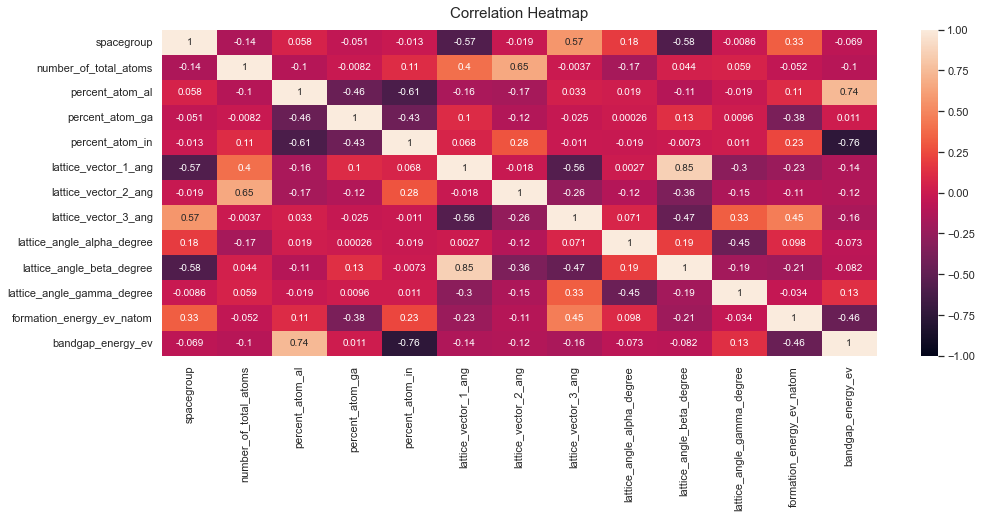

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

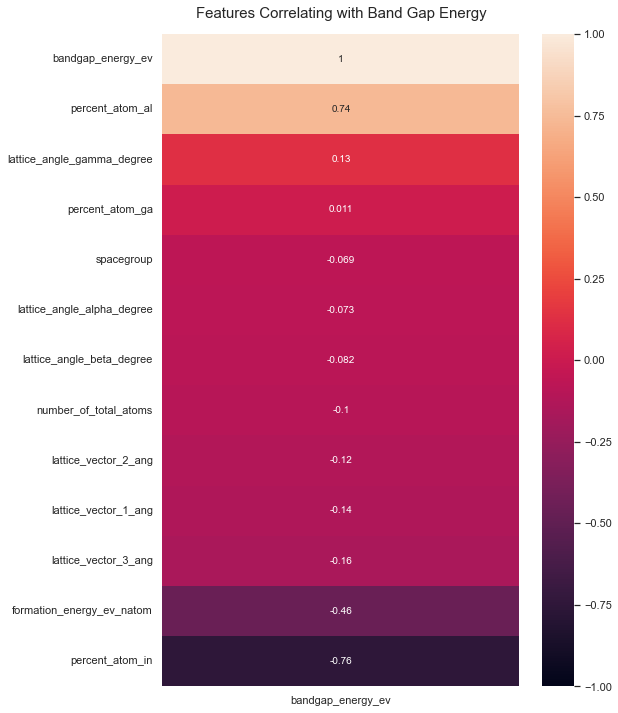

In [21]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['bandgap_energy_ev']].sort_values(by='bandgap_energy_ev', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Band Gap Energy', fontdict={'fontsize':15}, pad=16)

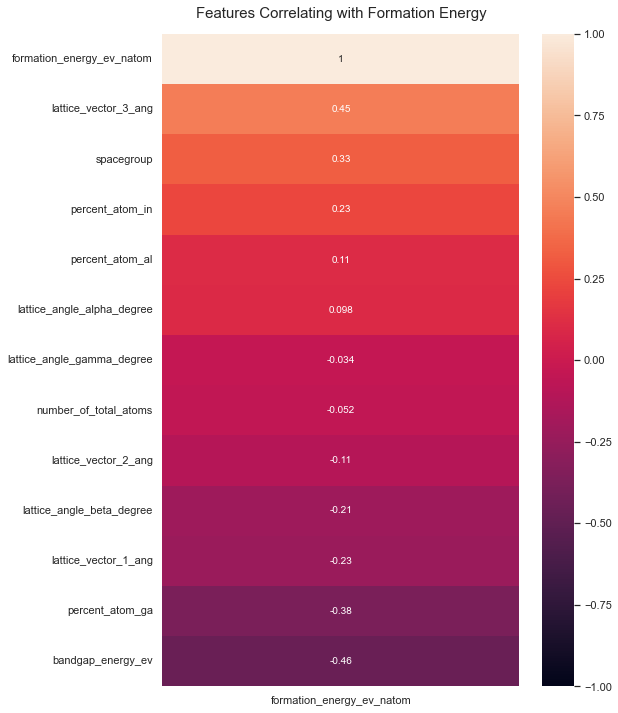

In [22]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['formation_energy_ev_natom']].sort_values(by='formation_energy_ev_natom', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Formation Energy', fontdict={'fontsize':15}, pad=16)

[0.4952, 0.5069, 0.5239, 0.5264, 0.4829, 0.5369, 0.4874, 0.6121, 0.6572]


,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
1971,194,10.0,0.2500,0.5000,0.2500,3.2434,3.2433,12.1161,90.0088,90.0037,119.9938,0.6572,0.4819
1230,194,10.0,0.5000,0.0000,0.5000,3.2964,3.2962,12.1828,90.0168,90.0124,119.9929,0.6121,1.4200
581,227,40.0,0.6875,0.0000,0.3125,5.9686,5.9679,14.2944,90.0070,89.9946,119.9997,0.5369,0.2961
476,227,40.0,0.4375,0.3750,0.1875,5.9567,5.9559,14.2821,90.0049,89.9980,119.9987,0.5264,0.9599
423,227,40.0,0.5625,0.1250,0.3125,5.9985,5.9983,14.6188,90.0255,89.9903,119.9999,0.5239,0.5201
307,206,80.0,0.5938,0.4062,0.0000,9.1549,9.1544,9.1544,90.0040,90.0043,89.9965,0.5069,1.9411
180,227,40.0,0.4375,0.1250,0.4375,10.4164,6.0348,14.8600,91.0287,91.1936,30.3390,0.4952,0.4109
1122,227,40.0,0.6250,0.0625,0.3125,5.9814,5.9811,14.5814,90.0278,89.9880,120.0008,0.4874,1.3422
522,227,40.0,0.7500,0.0000,0.2500,5.8872,5.8869,14.3978,89.9955,90.0055,119.9949,0.4829,0.7197


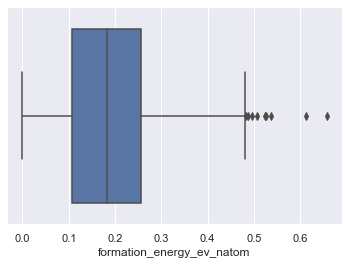

In [23]:
from matplotlib.cbook import boxplot_stats 
sns.boxplot(x=df["formation_energy_ev_natom"])
# boxplot_stats(df["formation_energy_ev_natom"]).pop(0)['fliers']
outliers = [y for stat in boxplot_stats(df['formation_energy_ev_natom']) for y in stat['fliers']]
print(outliers)
df.loc[df['formation_energy_ev_natom'].isin(outliers)].sort_values(by=['formation_energy_ev_natom'], ascending=False)

<AxesSubplot:xlabel='bandgap_energy_ev'>

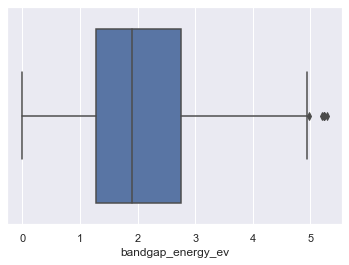

In [24]:
sns.boxplot(x=df["bandgap_energy_ev"])

<AxesSubplot:>

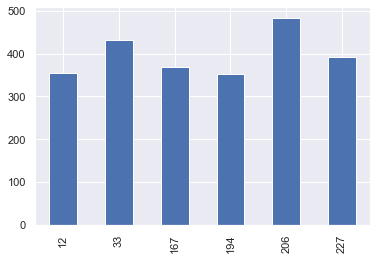

In [25]:
df['spacegroup'].value_counts().sort_index().plot.bar()

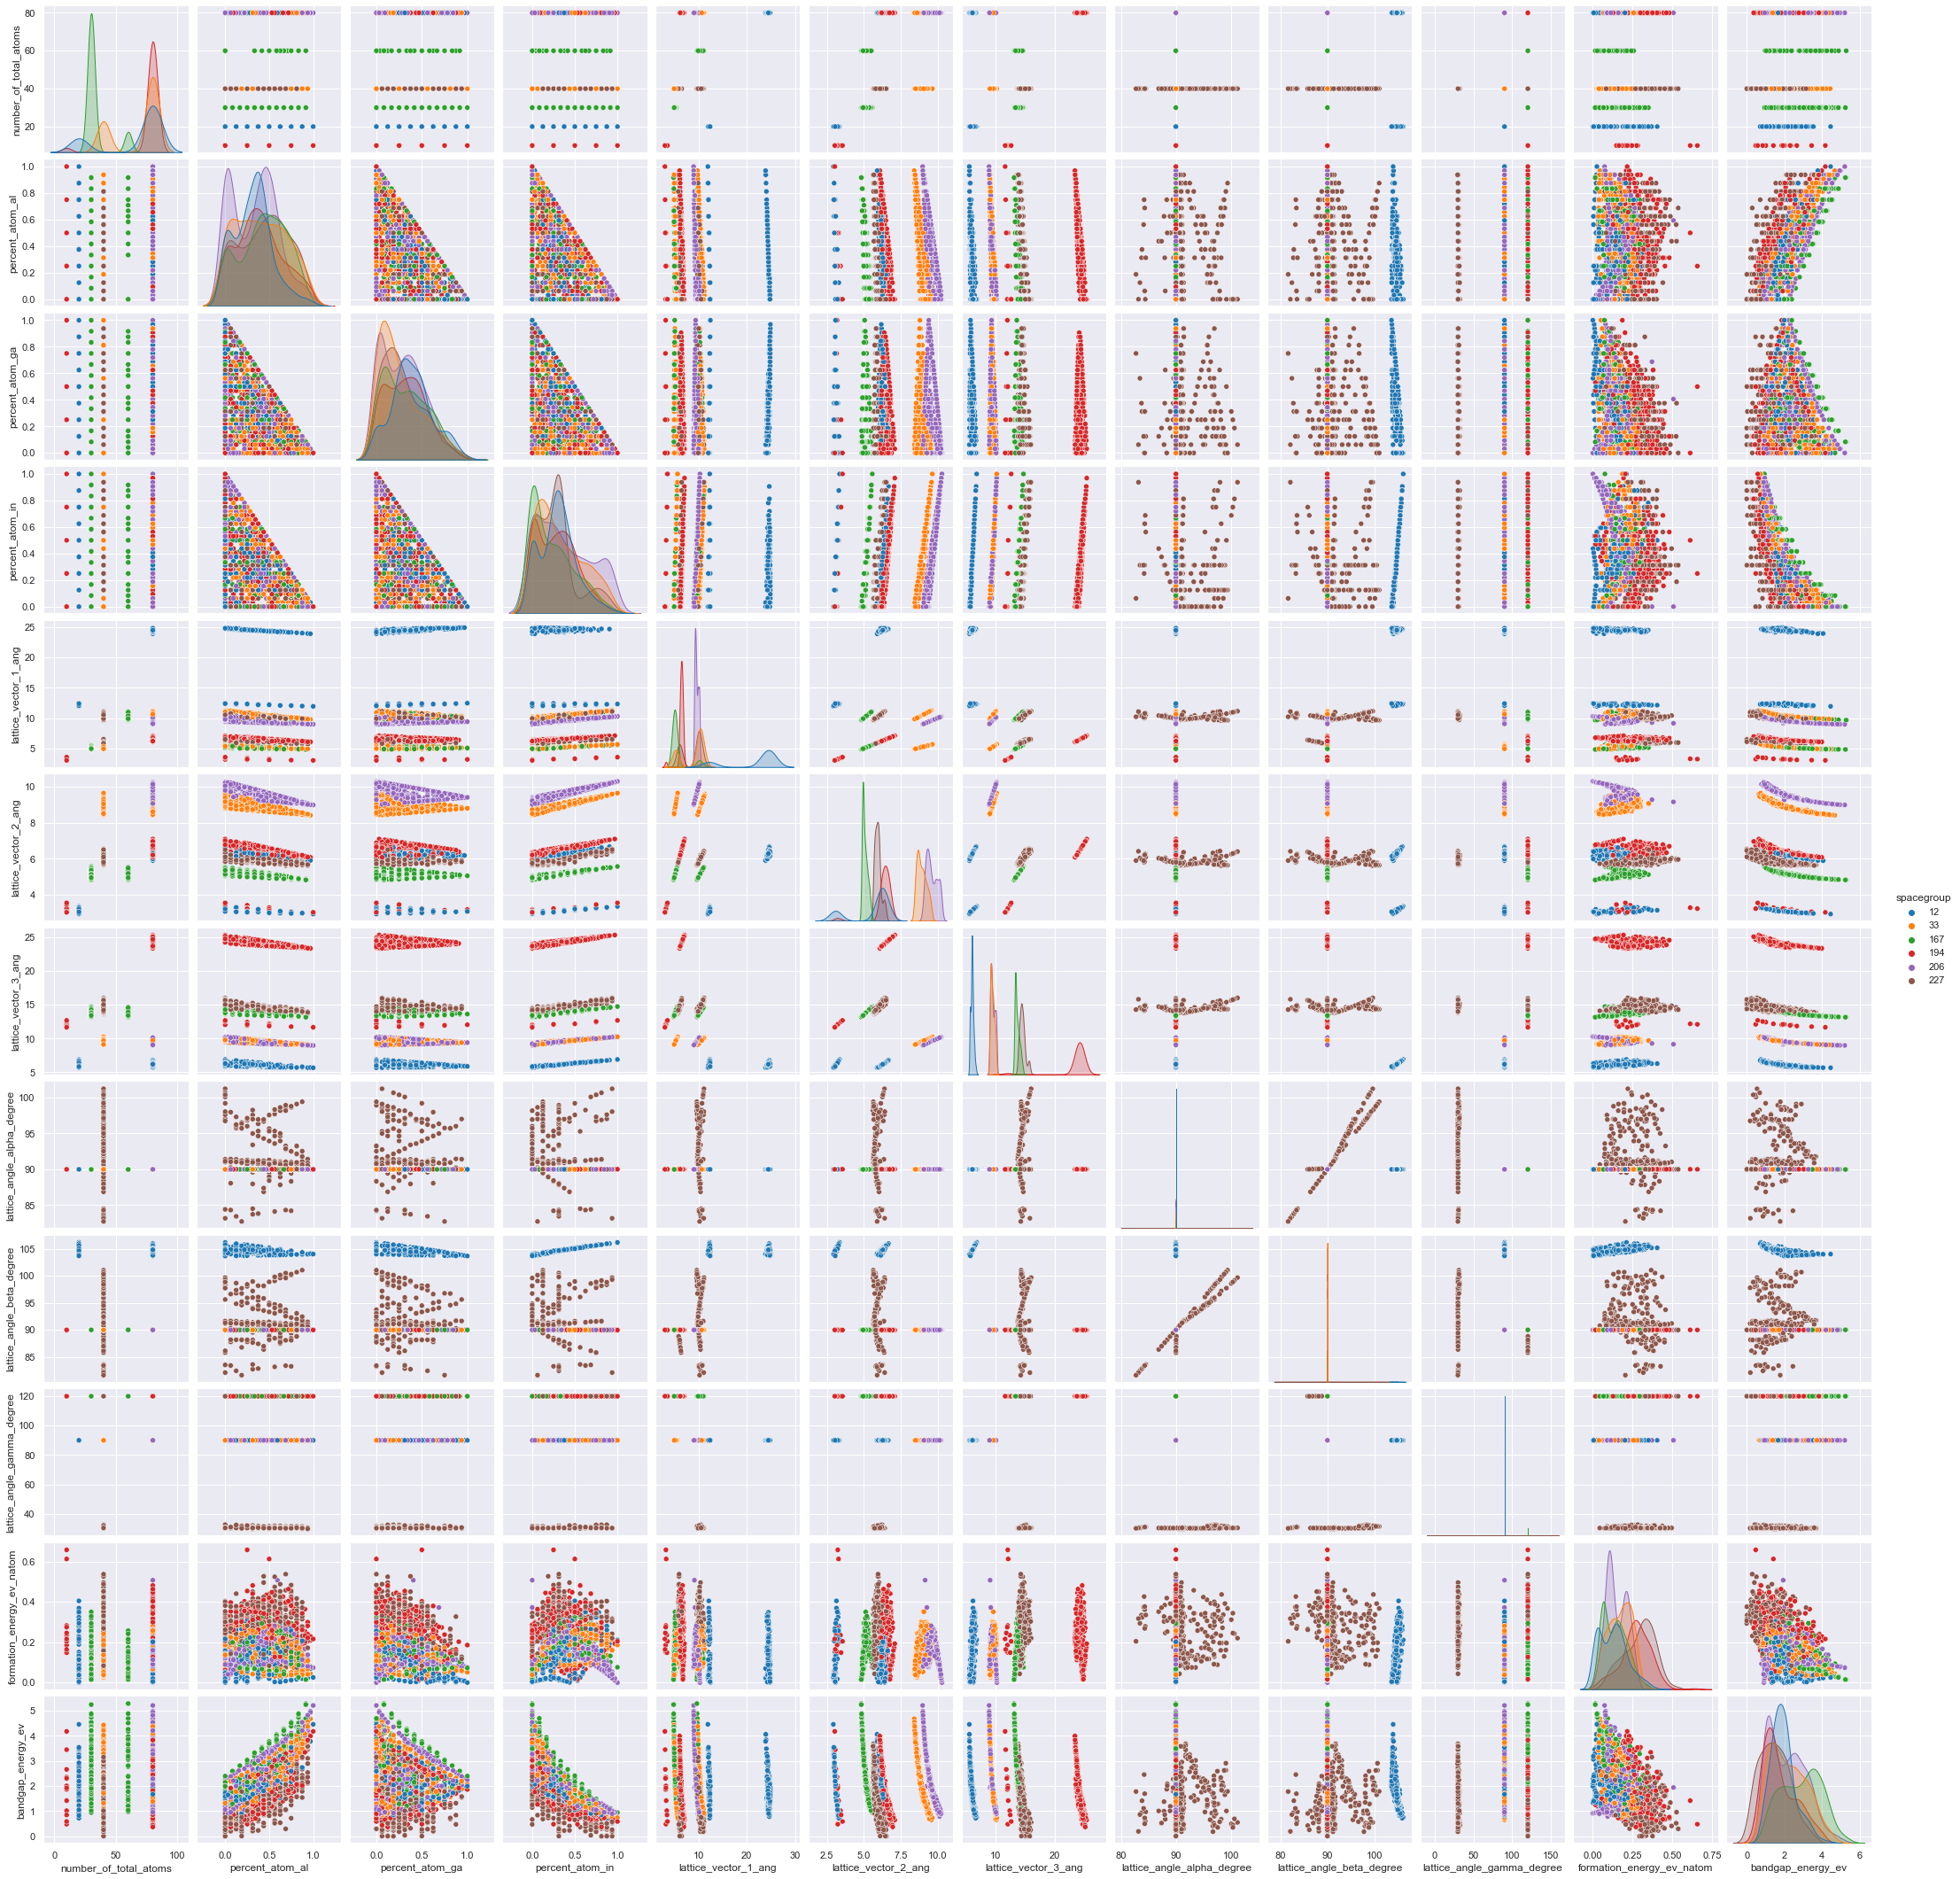

In [28]:
# Create the default pairplot
sns.pairplot(df, hue = "spacegroup", palette = "tab10")

<AxesSubplot:xlabel='spacegroup', ylabel='bandgap_energy_ev'>

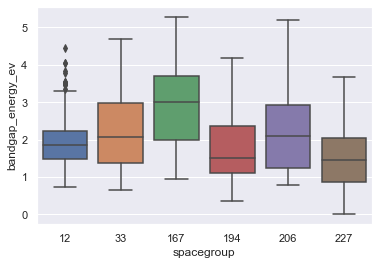

In [29]:
sns.boxplot(x="spacegroup", y="bandgap_energy_ev", data=df)

<AxesSubplot:xlabel='spacegroup', ylabel='formation_energy_ev_natom'>

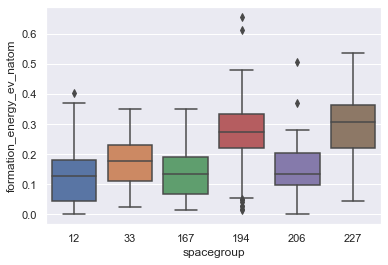

In [30]:
sns.boxplot(x="spacegroup", y="formation_energy_ev_natom", data=df)

<AxesSubplot:xlabel='spacegroup', ylabel='percent_atom_in'>

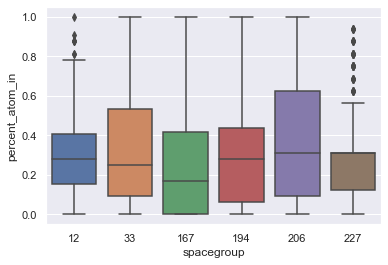

In [33]:
sns.boxplot(x="spacegroup", y="percent_atom_in", data=df)